In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_excel("Customer_data.xlsx")
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

## data exploration and preprocessing

In [3]:
# Remove customerID 
df.drop('customerID', axis=1, inplace=True)

# Remove spaces
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing values with median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [4]:
# Converting yes/no to 1/0
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Encode remaining categorical columns using LabelEncoder
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [5]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


## machinelearning model capable of predicting customer churn.

In [7]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=1)
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

## evaluation of model performance

In [8]:
def evaluate_model(name, model):
    y_pred = model.predict(X_test)
    print(f"\n {name} Model Evaluation:")
    print("Accuracy :", round(accuracy_score(y_test, y_pred), 4))
    print("Precision:", round(precision_score(y_test, y_pred), 4))
    print("Recall   :", round(recall_score(y_test, y_pred), 4))
    print("F1 Score :", round(f1_score(y_test, y_pred), 4))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

evaluate_model("Logistic Regression", lr)
evaluate_model("Random Forest", rf)
evaluate_model("XGBoost", xgb)



 Logistic Regression Model Evaluation:
Accuracy : 0.8048
Precision: 0.609
Recall   : 0.5862
F1 Score : 0.5974
Confusion Matrix:
 [[930 131]
 [144 204]]

 Random Forest Model Evaluation:
Accuracy : 0.8062
Precision: 0.6263
Recall   : 0.5345
F1 Score : 0.5767
Confusion Matrix:
 [[950 111]
 [162 186]]

 XGBoost Model Evaluation:
Accuracy : 0.8034
Precision: 0.6047
Recall   : 0.5891
F1 Score : 0.5968
Confusion Matrix:
 [[927 134]
 [143 205]]


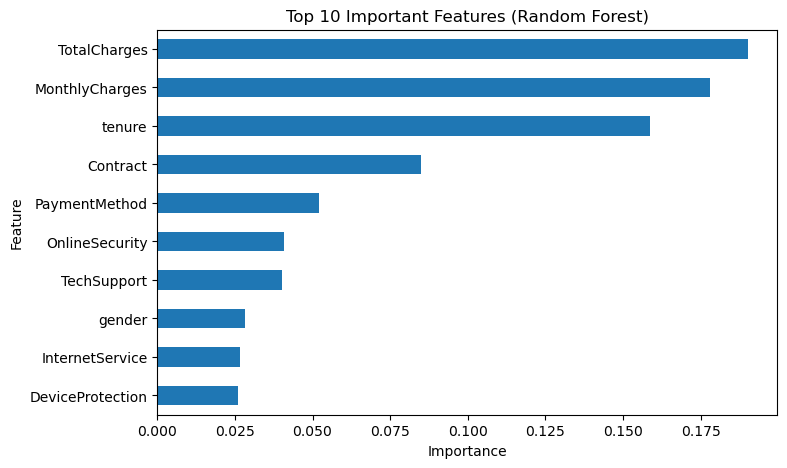

In [9]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().tail(10).plot(kind='barh', figsize=(8, 5))
plt.title("Top 10 Important Features (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


## Final Record

Video link : https://drive.google.com/file/d/1GnsSUTEMMsTZqfasvpoHMWH30qlqK_vT/view?usp=sharing